# The Sparks Foundation || GRIPFEB21

## Data Science and Business Analytics

## TASK 4 : Exploratory Data Analysis - Terrorism

## *Author : Vaishnavi S*


**To Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism', to find out the hot zone of terrorism and derive all security issues and insights from EDA.**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
df = pd.read_csv('D:\Spark-GRIP Intern\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Shape of dataset

In [4]:
df.shape

(181691, 135)

- There are total 181691 samples and 135 features.

## Data cleaning

### Checking the missing values

In [5]:
for col in df.columns:
  print(col, ":", (df[col].isnull().sum()/len(df))*100)

eventid : 0.0
iyear : 0.0
imonth : 0.0
iday : 0.0
approxdate : 94.91499303762983
extended : 0.0
resolution : 98.77814531264619
country : 0.0
country_txt : 0.0
region : 0.0
region_txt : 0.0
provstate : 0.23171208260177995
city : 0.23886708752772565
latitude : 2.507554034046816
longitude : 2.5081044190411195
specificity : 0.0033023099658210917
vicinity : 0.0
location : 69.45638474112641
summary : 36.396409288297164
crit1 : 0.0
crit2 : 0.0
crit3 : 0.0
doubtterr : 0.0005503849943035153
alternative : 84.03278093026071
alternative_txt : 84.03278093026071
multiple : 0.0005503849943035153
success : 0.0
suicide : 0.0
attacktype1 : 0.0
attacktype1_txt : 0.0
attacktype2 : 96.52486914596761
attacktype2_txt : 96.52486914596761
attacktype3 : 99.7644352224381
attacktype3_txt : 99.7644352224381
targtype1 : 0.0
targtype1_txt : 0.0
targsubtype1 : 5.709143545910364
targsubtype1_txt : 5.709143545910364
corp1 : 23.418881507614575
target1 : 0.35004485637703575
natlty1 : 0.8580502061191804
natlty1_txt : 0.85

### Handling the missing values

In [6]:
# Dropping columns where more than 160000 records are empty
new_df = df.dropna(thresh=160000,axis=1)

In [7]:
new_df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [8]:
### checking again the shape of dataset.
new_df.shape

(181691, 47)

In [9]:
new_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [10]:
df2=(new_df.isnull().sum()/len(new_df))*100
df2.head(25)

eventid            0.000000
iyear              0.000000
imonth             0.000000
iday               0.000000
extended           0.000000
country            0.000000
country_txt        0.000000
region             0.000000
region_txt         0.000000
provstate          0.231712
city               0.238867
latitude           2.507554
longitude          2.508104
specificity        0.003302
vicinity           0.000000
crit1              0.000000
crit2              0.000000
crit3              0.000000
doubtterr          0.000550
multiple           0.000550
success            0.000000
suicide            0.000000
attacktype1        0.000000
attacktype1_txt    0.000000
targtype1          0.000000
dtype: float64

## Data Visualization

In [11]:
v = new_df['iyear'].value_counts()

### 1. Number Of Terrorist Activities Each Year

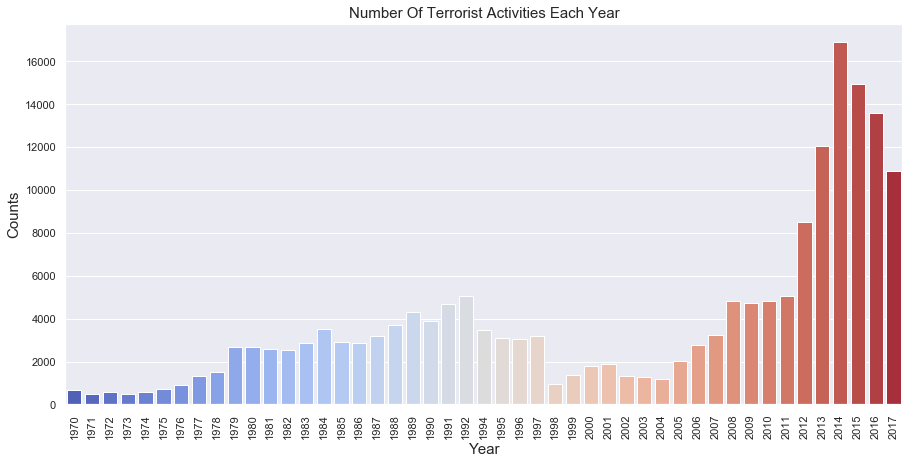

In [12]:
plt.figure(figsize = (15,7))
sns.set(style = 'darkgrid')
sns.barplot(x = v.index, y = v, data = new_df, palette = 'coolwarm')

plt.xticks(rotation  = 90)

plt.title('Number Of Terrorist Activities Each Year', fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights:__
- From here we can see that most of the attack happend in 2014. & Here we can observe the number of terrorist activities have gone up sharply after 2010.


### 2. Country affected by terrorism

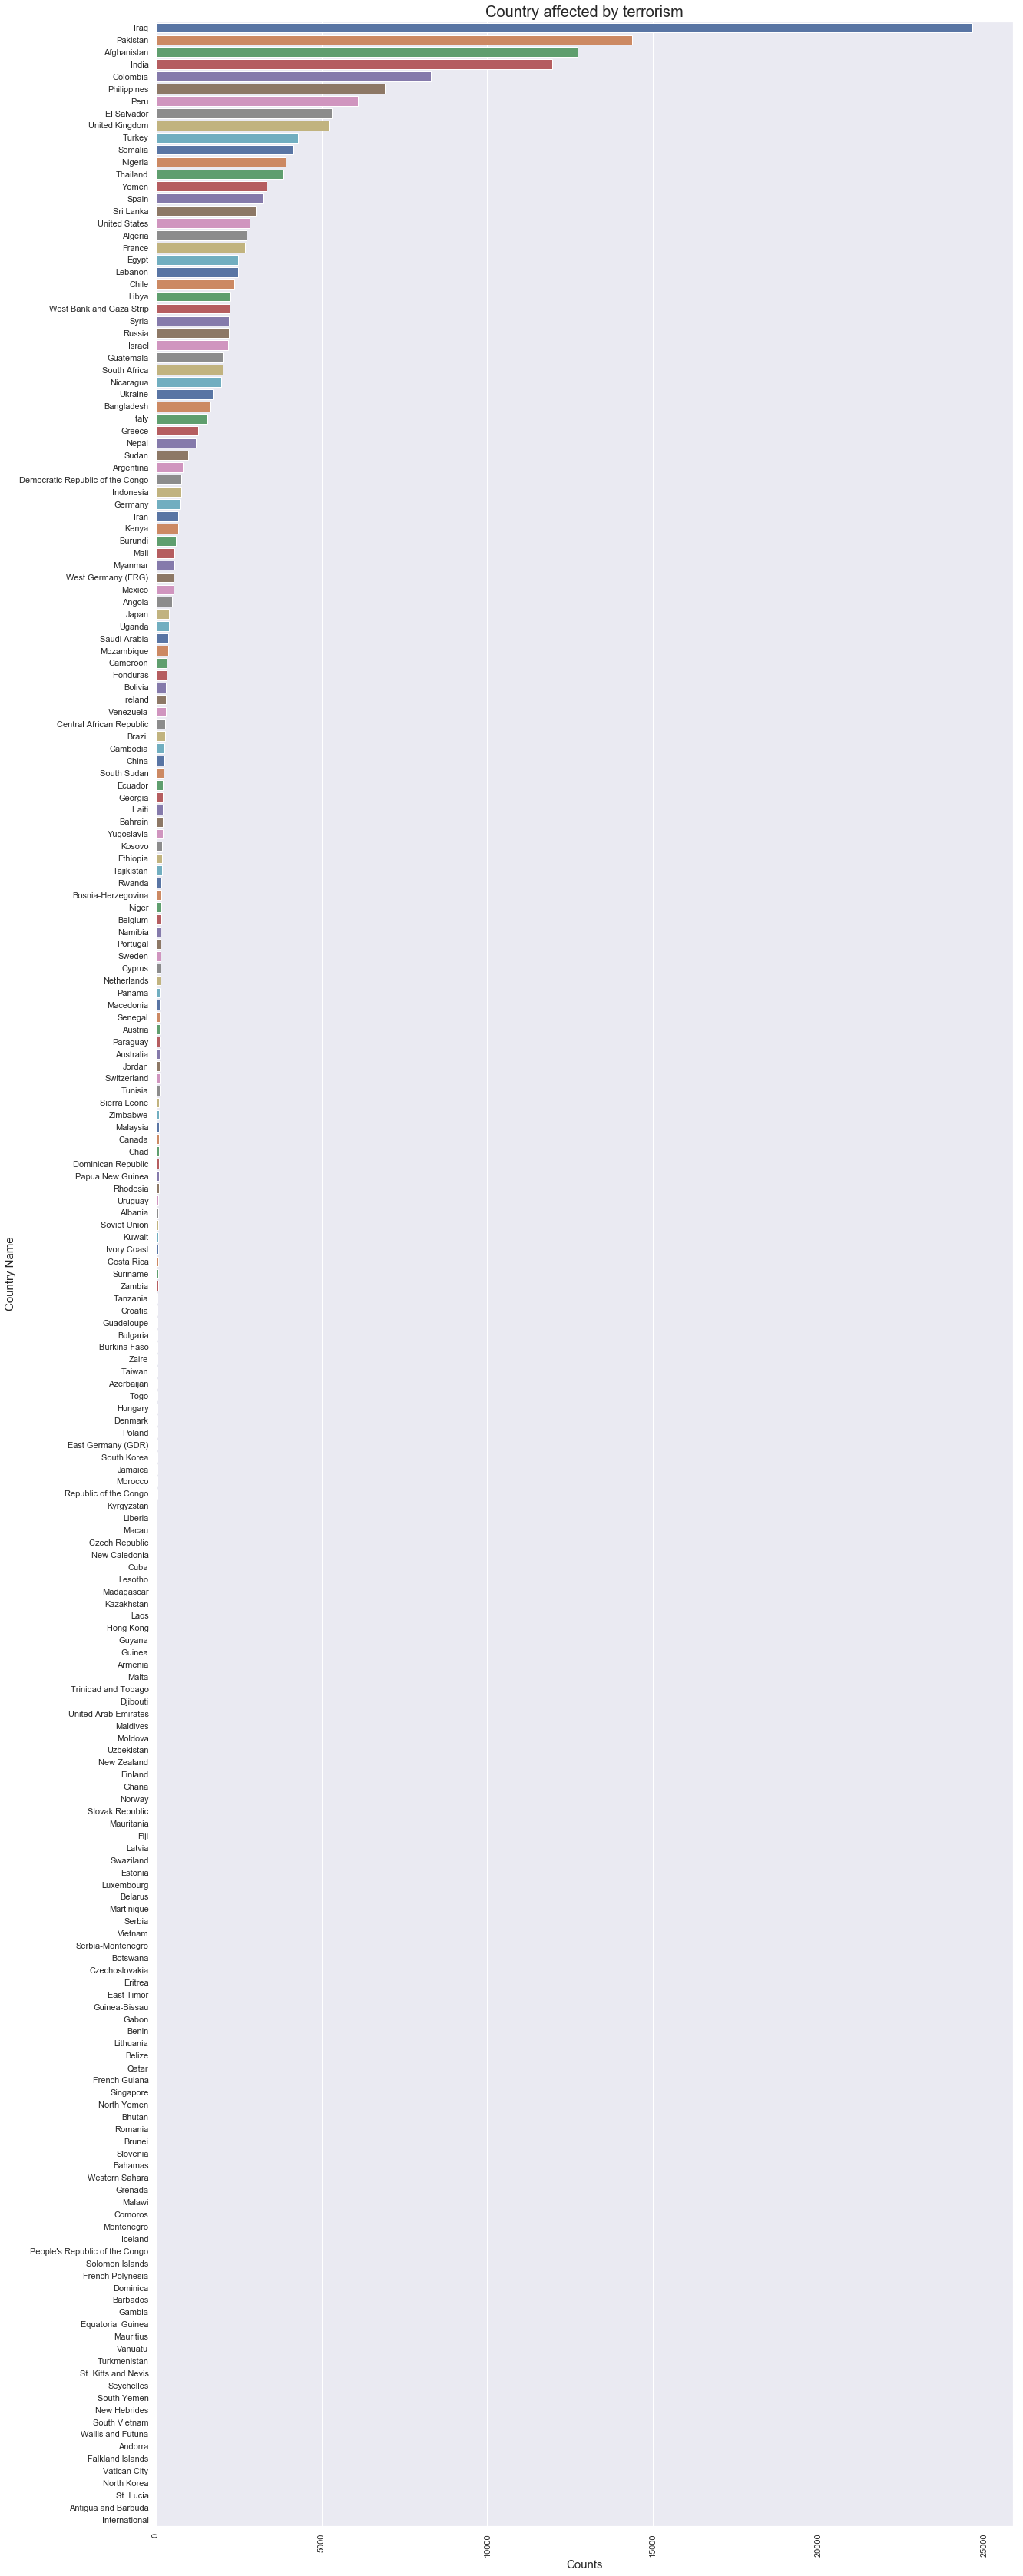

In [13]:
v = df['country_txt'].value_counts()
plt.figure(figsize = (20,60))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v, y = v.index, data = new_df, palette = 'deep')

plt.xticks(rotation  = 90)


plt.title('Country affected by terrorism', fontsize = 20)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('Country Name',fontsize = 15)
plt.show()


__Insights__:

- From here we can see that most of the terrorist attack happend in '__Iraq__', '__Pakistan__', '__Afghanistan__', '__India__' & '__Colombia__'.


### 3. Region affected by terrorism

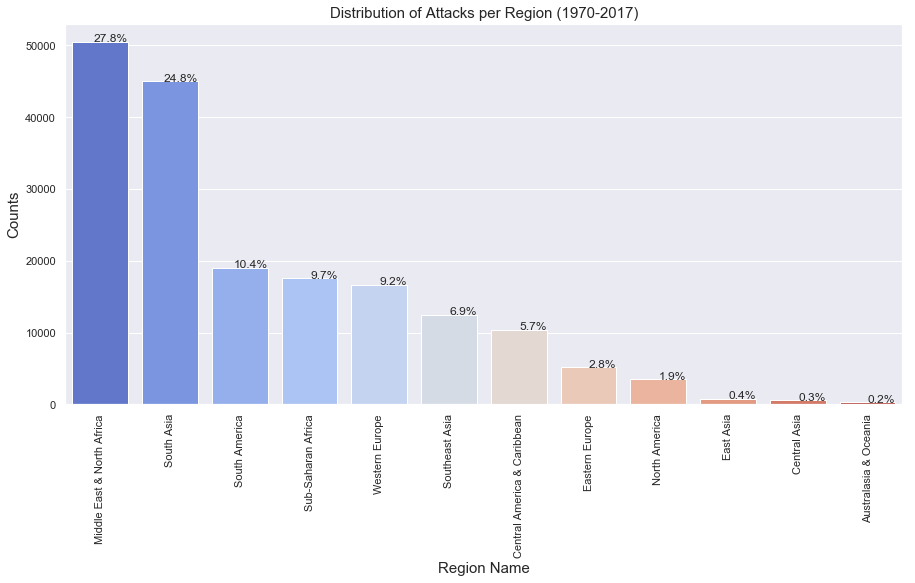

In [14]:
v = df['region_txt'].value_counts()
plt.figure(figsize = (15,7))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'coolwarm')

plt.xticks(rotation  = 90)
total = float(len(new_df['region_txt']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('Distribution of Attacks per Region (1970-2017)', fontsize = 15)
plt.xlabel('Region Name',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:

- From here we can see that most of the terrorist attack happend in '__Middle East & North Africa__ region.The region represents 27.8% of all records between 1970 and 2017.


### 4. State affected by terrorism

- Let selected top 100 state all over the world.those mostly affected by terrorism.

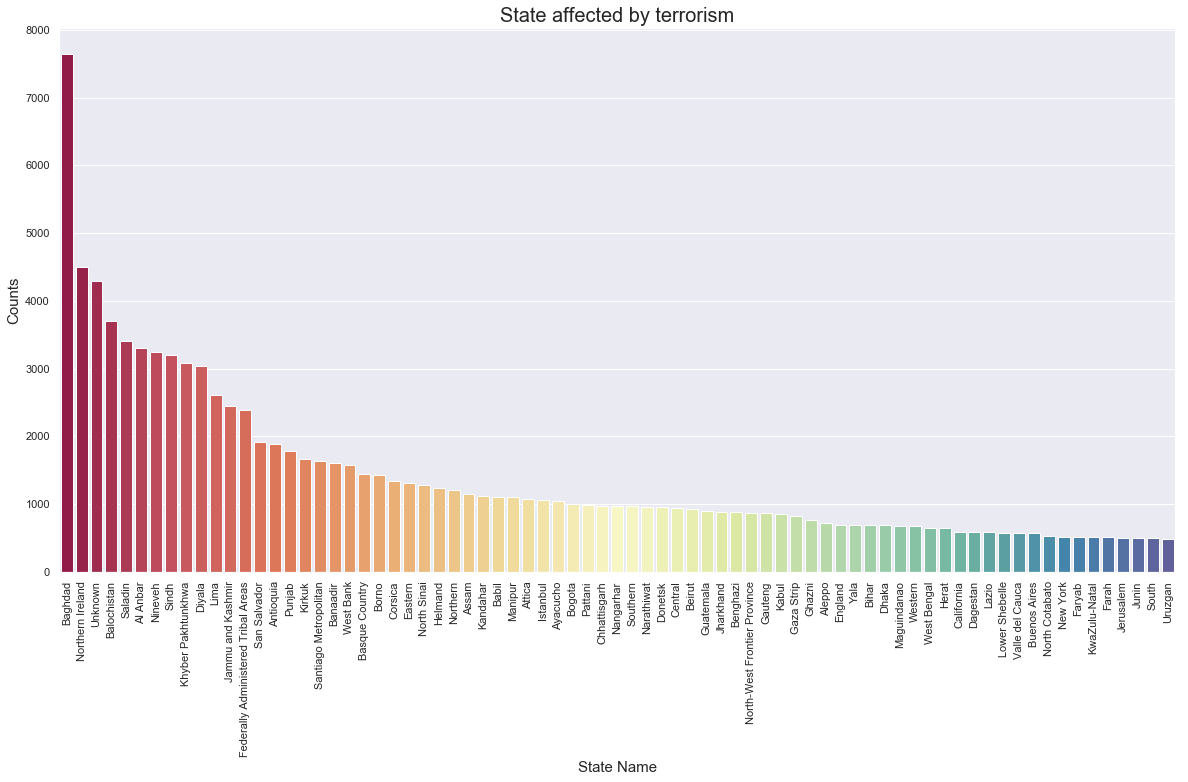

In [15]:
v = new_df['provstate'].value_counts()[:75]  # Here we selected  mostly  affected  75 states by terrorism.
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'Spectral')

plt.xticks(rotation  = 90)


plt.title('State affected by terrorism', fontsize = 20)
plt.xlabel('State Name',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()


__Insights__:

- From here above we can see that most of the terrorist attack happend in '__Baghdad__', '__Northern Ireland__' state from 1970 to 2017.


### 5. City affected by terrorism

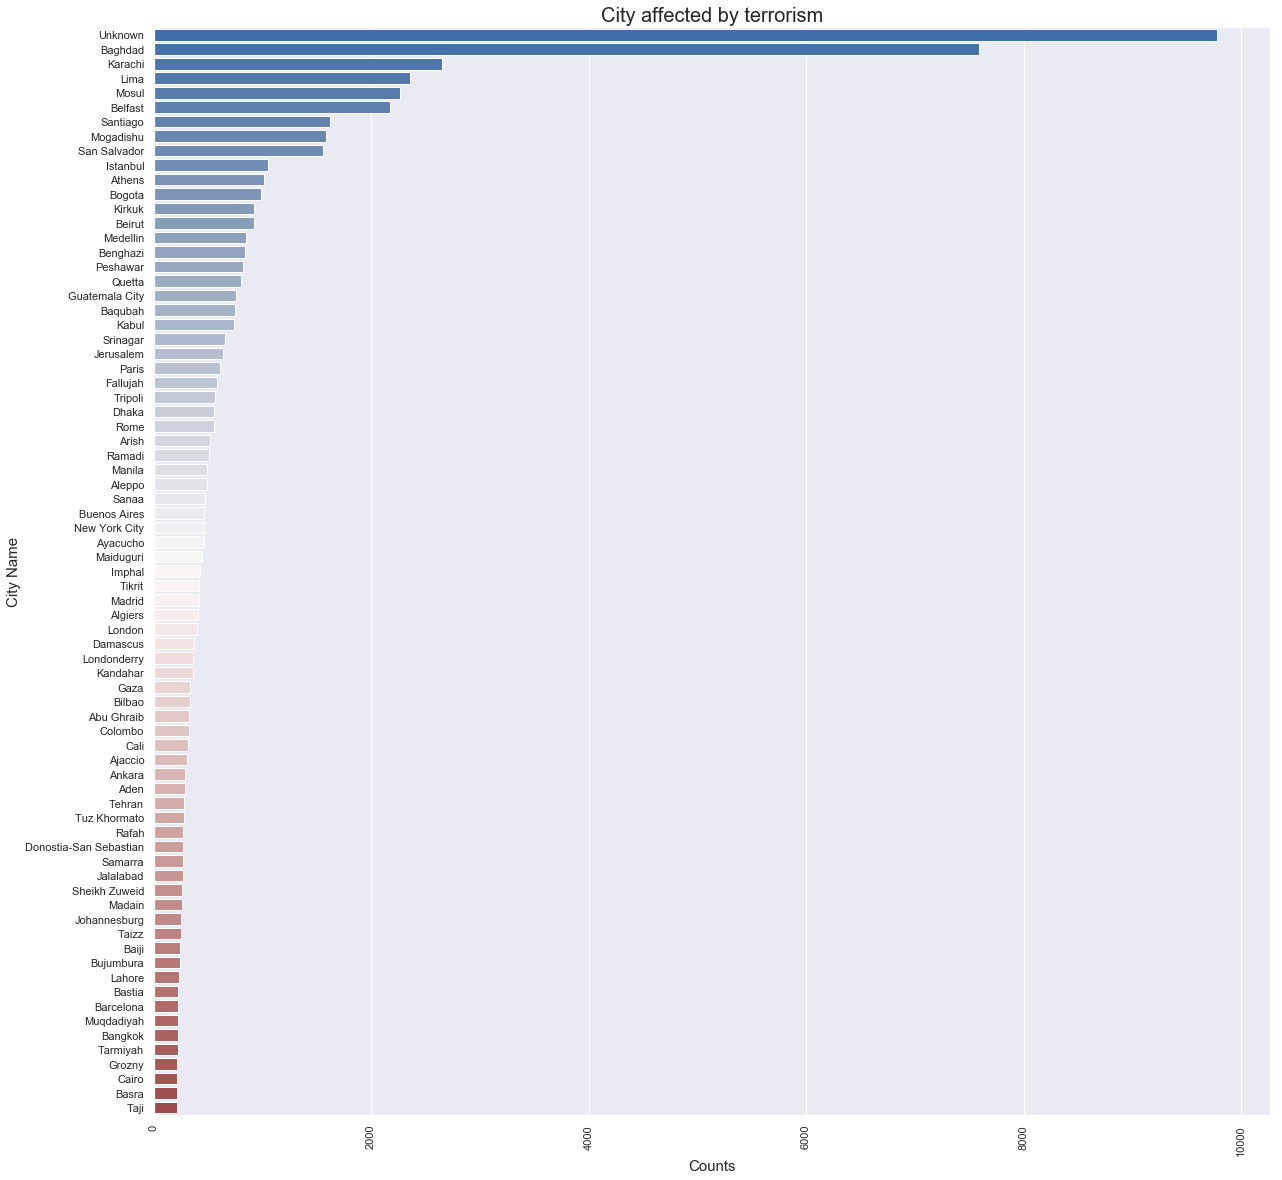

In [16]:
v = new_df['city'].value_counts()[:75]
plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v, y = v.index, data = new_df, palette = 'vlag')

plt.xticks(rotation  = 90)


plt.title('City affected by terrorism', fontsize = 20)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('City Name',fontsize = 15)
plt.show()


__Insights__:

- From here above we can see that most of the terrorist attack happend in '__Unknown__', '__Baghdad__', '__Karachi__' & '__Lima__' city from 1970 to 2017.



### 6. Terrorist attack Successed or failed

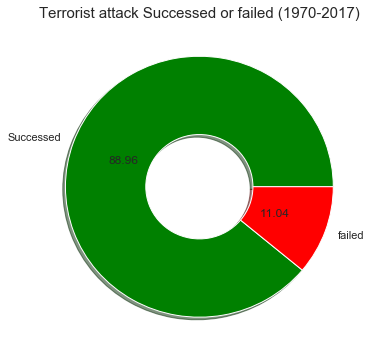

In [17]:
v = df['success'].value_counts()
fig = plt.gcf()
fig.set_size_inches((6,6))

cmap = plt.get_cmap('Set1')
plt.pie(v, labels = ['Successed', 'failed'], autopct = '%0.02f', colors=['green','red'],
        labeldistance = 1.1, wedgeprops= dict(width = 0.6), shadow = True)
plt.title('Terrorist attack Successed or failed (1970-2017)', fontsize = (15))
plt.show()

__Insights__:

- Here form above, we can see that approx 89% terrorist attack is sucessed and 11% is failed form 1970 to 2017.

### 7. Suicide or Not Suicide

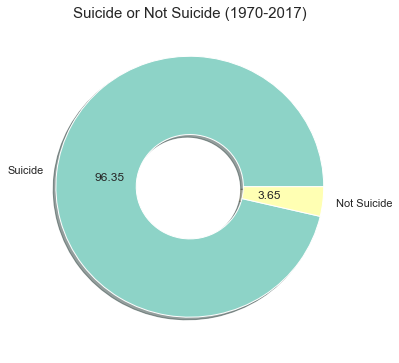

In [18]:
v = df['suicide'].value_counts()
fig = plt.gcf()
fig.set_size_inches((6,6))

cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))
plt.pie(v, labels = ['Suicide', 'Not Suicide'], autopct = '%0.02f', colors = color, 
        labeldistance = 1.1, wedgeprops= dict(width = 0.6), shadow = True)
plt.title('Suicide or Not Suicide (1970-2017)', fontsize = (15))
plt.show()

__Insights__:
- From above we can see that approx 97% terrorist attack was suicide & 3% wasn't suicide.

### 8. Attacktype

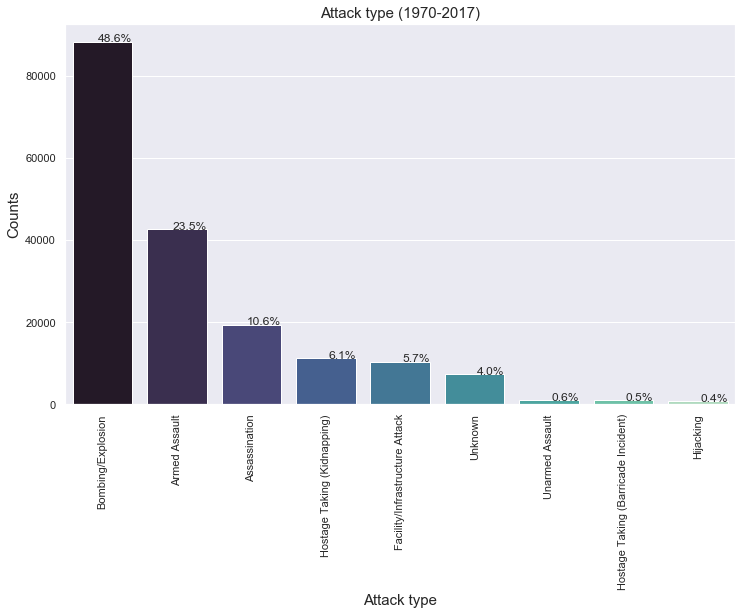

In [19]:
v = df['attacktype1_txt'].value_counts()
plt.figure(figsize = (12,7))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'mako')

plt.xticks(rotation  = 90)
total = float(len(new_df['attacktype1_txt']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('Attack type (1970-2017)', fontsize =15)
plt.xlabel('Attack type',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see that Bombing/Explosion is most common terrorist attack.

### 9. Target type

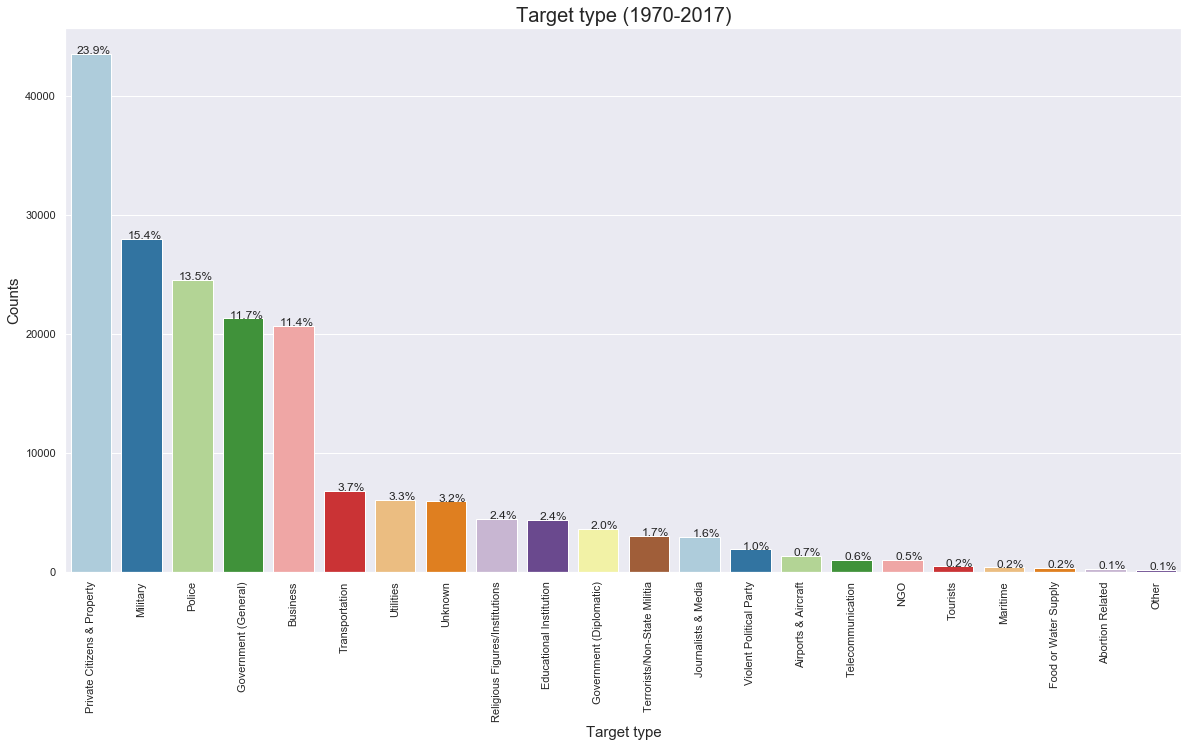

In [20]:
v = df['targtype1_txt'].value_counts()
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'Paired')

plt.xticks(rotation  = 90)
total = float(len(new_df['targtype1_txt']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('Target type (1970-2017)', fontsize = 20)
plt.xlabel('Target type',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see terrorist attack mostly affected the __Private Citizens & Property__. that is approx 49% from (1970-2017).

### 10. Top 20 terrorist group name

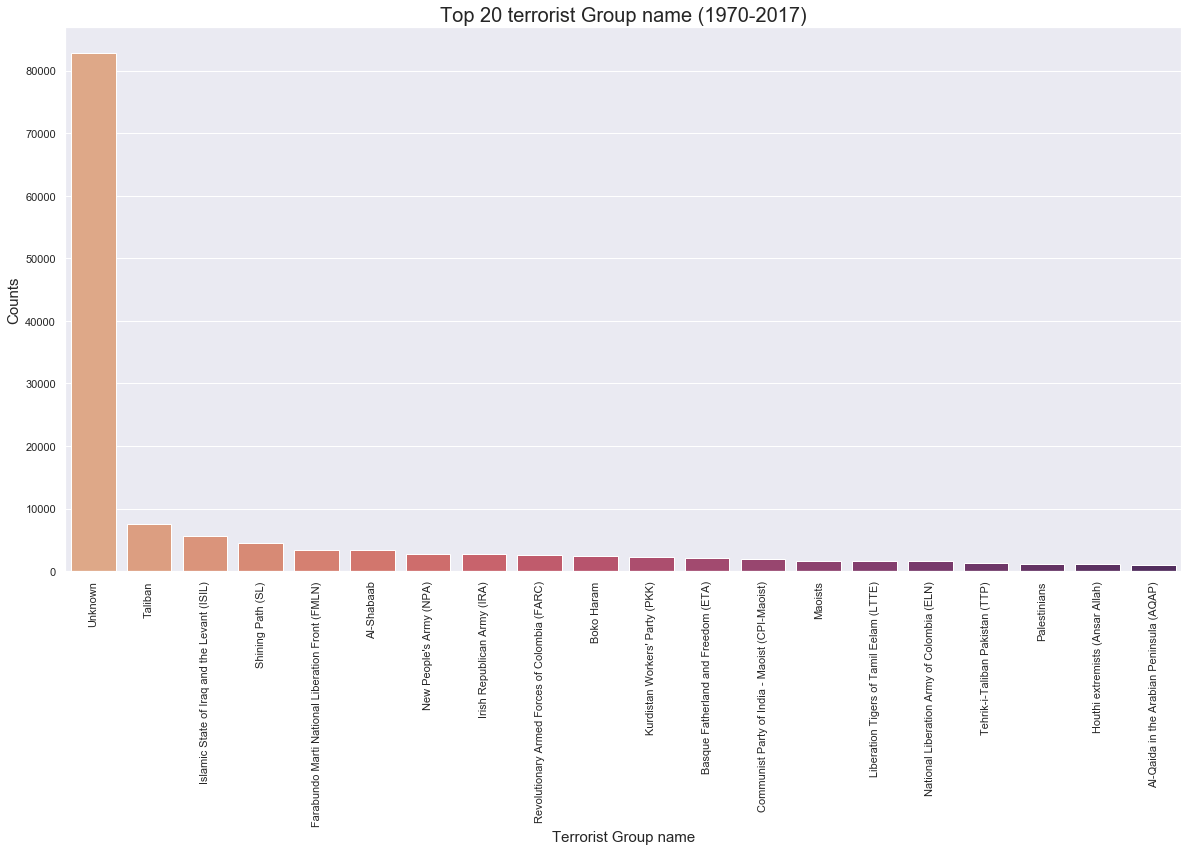

In [21]:
v  = df['gname'].value_counts()[:20]  # top 20 terrorist group name
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
sns.barplot(x = v.index, y = v, data = new_df, palette = 'flare')
plt.xticks(rotation  = 90)

plt.title('Top 20 terrorist Group name (1970-2017)', fontsize = 20)
plt.xlabel('Terrorist Group name',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see that some famous terrorist group name was '__Unknown__', '__Taliban__', '__Islamic State of Iraq and the Levant (ISIL)__ form 1970 to 2017.

### 11. Weapon type

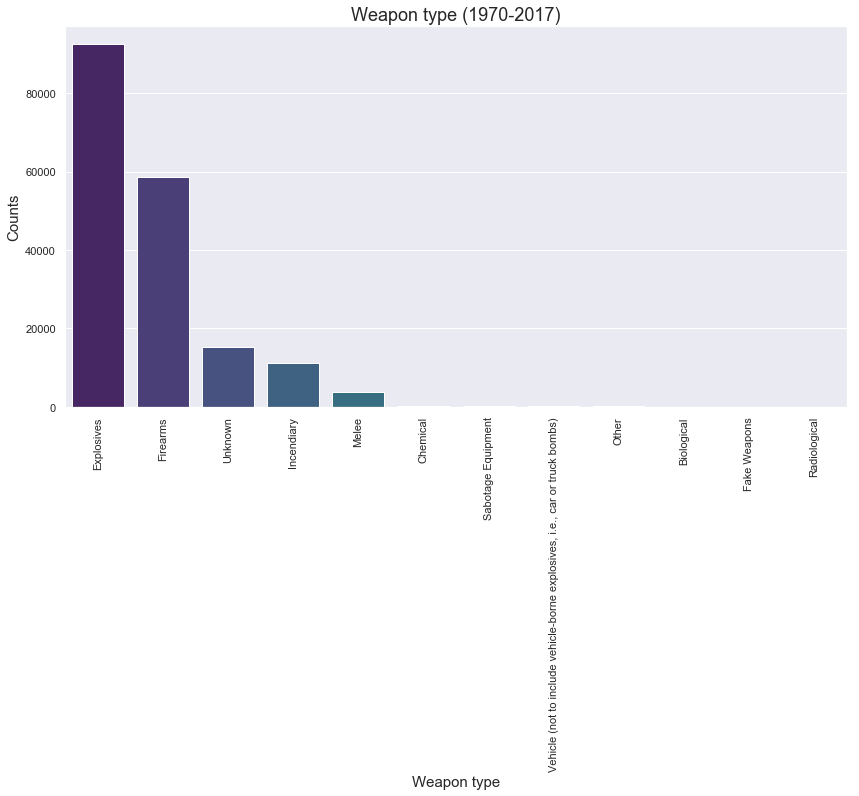

In [22]:
v= df['weaptype1_txt'].value_counts()
plt.figure(figsize = (14,7))

sns.barplot(x = v.index, y = v, data = new_df, palette = 'viridis')
plt.xticks(rotation = 90)

plt.title('Weapon type (1970-2017)', fontsize = 18)
plt.xlabel('Weapon type',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see that most  famous weapon type was '__Explosives__' form 1970 to 2017.

### 12. Successful or Unsuccessful terrorist strike

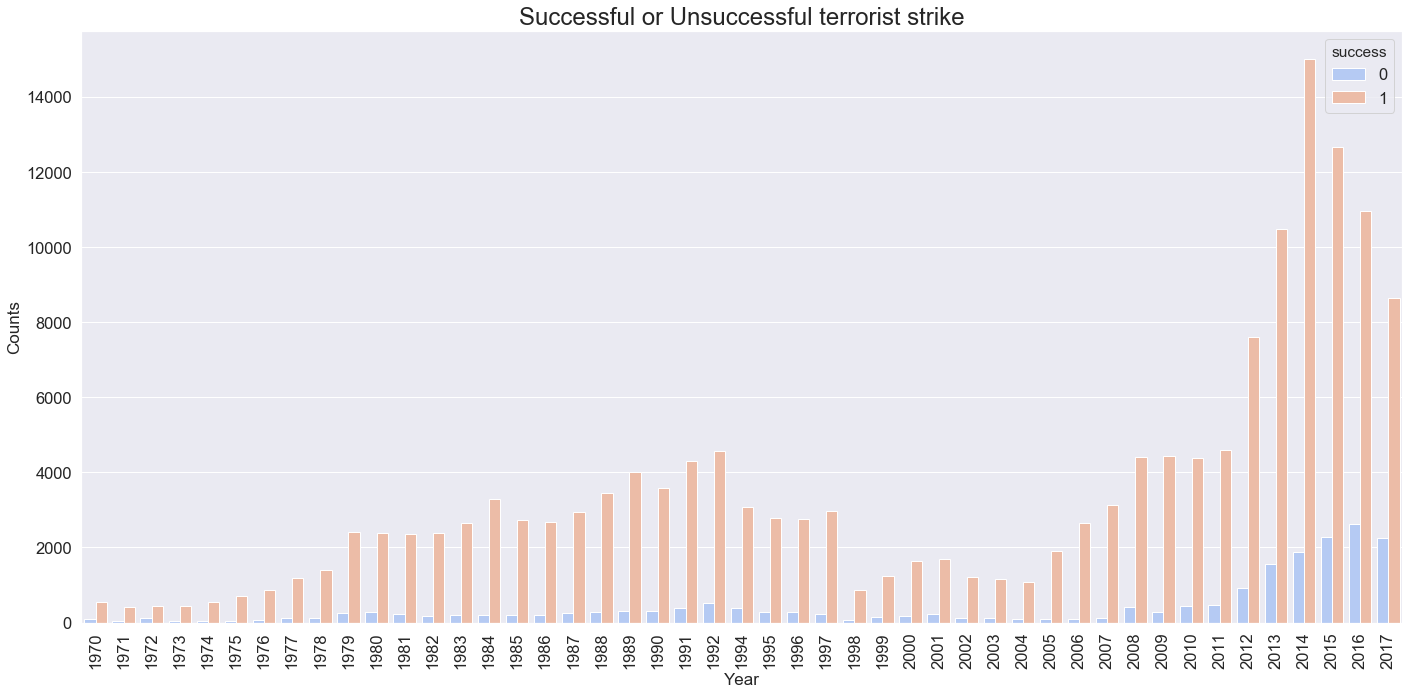

In [23]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=new_df,hue='success', orient='v',palette = 'coolwarm')
plt.xlabel('Year',fontsize=17)
plt.ylabel('Counts', fontsize=17)

plt.title('Successful or Unsuccessful terrorist strike', fontsize=24)

plt.xticks(rotation=90)
plt.tight_layout()

### 13. The incident was/wasn't a suicide attack (1970-2017)

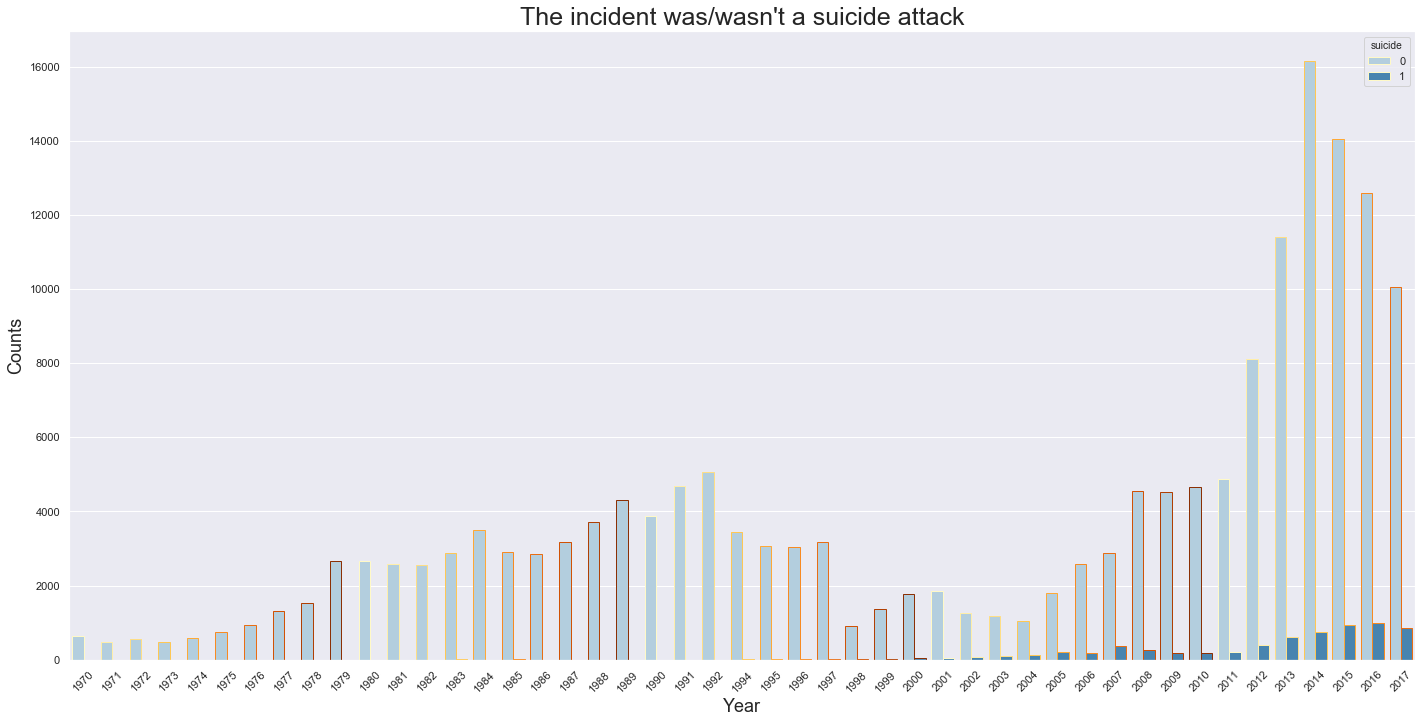

In [24]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=new_df,hue='suicide',  palette = 'Blues',edgecolor=sns.color_palette("YlOrBr", 10));
plt.title("The incident was/wasn't a suicide attack", fontsize=25)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### 14. Highest No. of  people killed by country

In [25]:
 c = new_df.groupby('country_txt')
 x = c['nkill'].agg(np.sum)


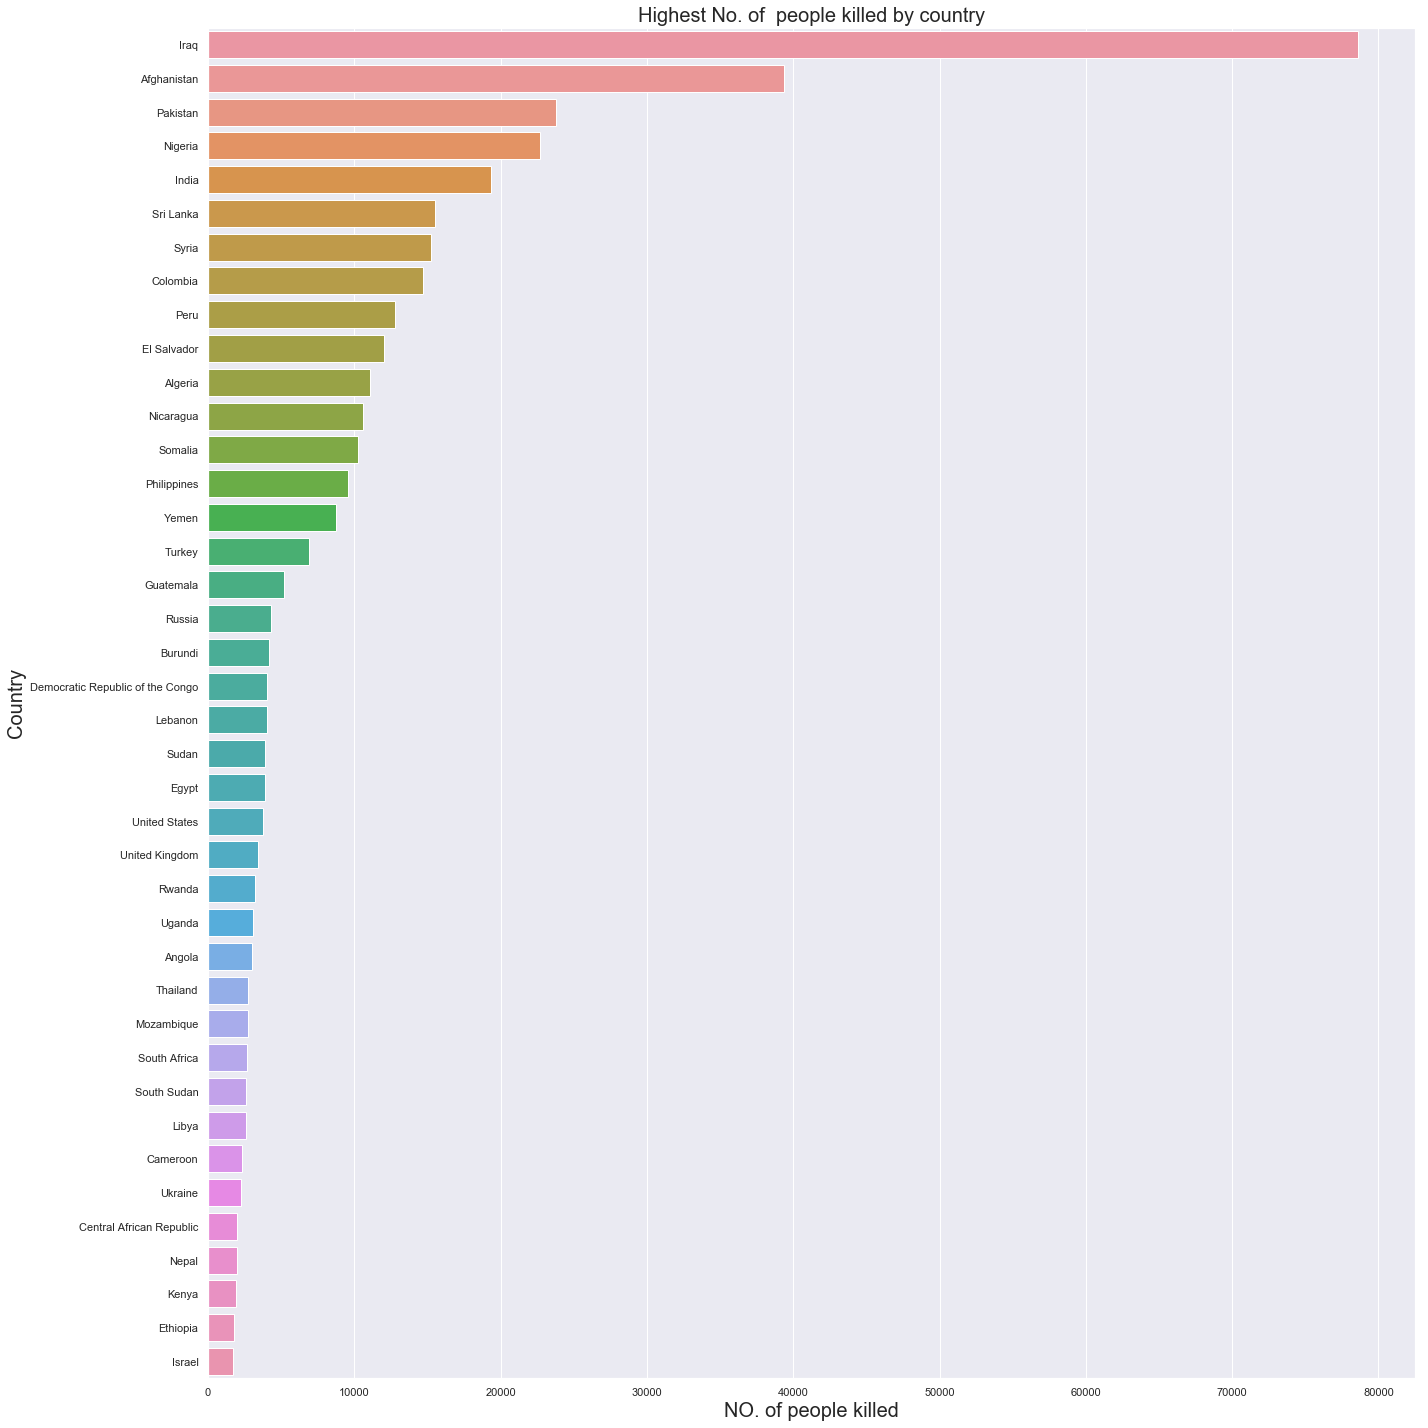

In [26]:
plt.figure(figsize = (20,20))
sns.barplot(x = x.nlargest(n = 40), y= x.nlargest(n = 40).index)  #n=40(selected 40 largest country based on terrorism activity)
plt.title("Highest No. of  people killed by country", fontsize=20)
plt.xlabel('NO. of people killed',fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.tight_layout()
plt.show()

__Insights:__
- Highest Number of death of people happend in __Iraq__, __Afganisthan__, __Pakisthan__, __Nigeria__ & __India__ from 1970 to 2017. 

### 15. Highest No. of people killed by Region

<Figure size 1440x720 with 0 Axes>

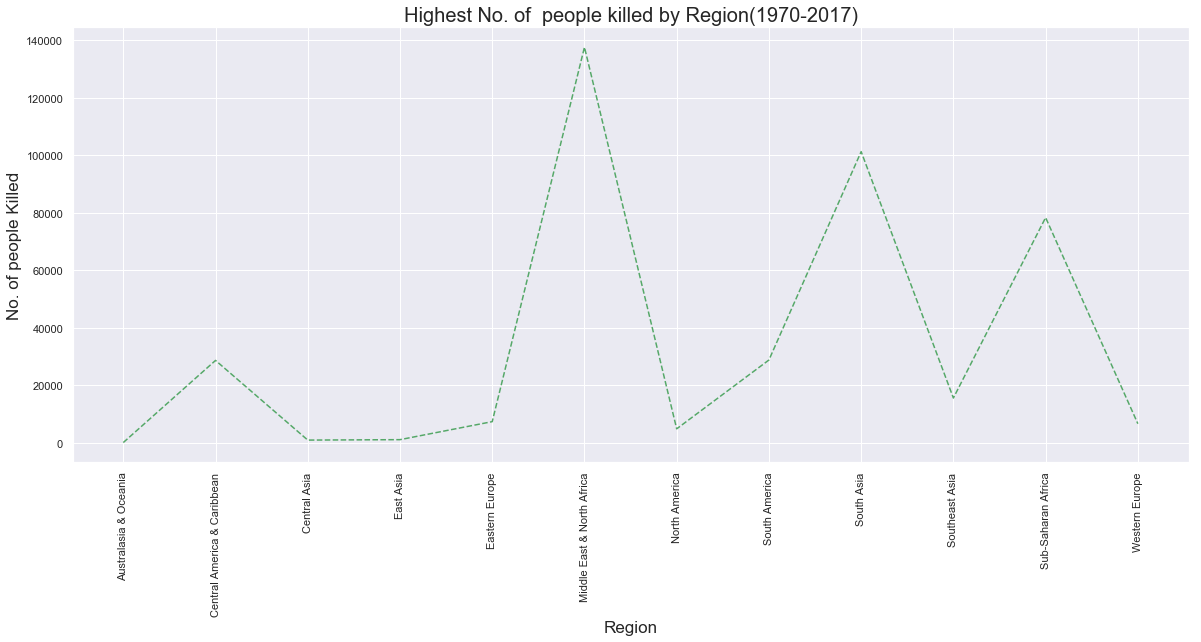

In [27]:
plt.figure(figsize = (20,10))
region_grp = df.groupby('region_txt')
v = region_grp['nkill'].agg(np.sum)

plt.figure(figsize=(20,8))
plt.plot(v,'g--')
plt.xticks(rotation=90)
plt.title('Highest No. of  people killed by Region(1970-2017)', fontsize = 20)
plt.xlabel('Region', fontsize = 17)
plt.ylabel('No. of people Killed', fontsize=  17)
plt.show()

__Insights:__
- Highest No. of people killed in __Middle east and Africa__ region(1970-2017).

### 16. Highest No. of  people killed by State

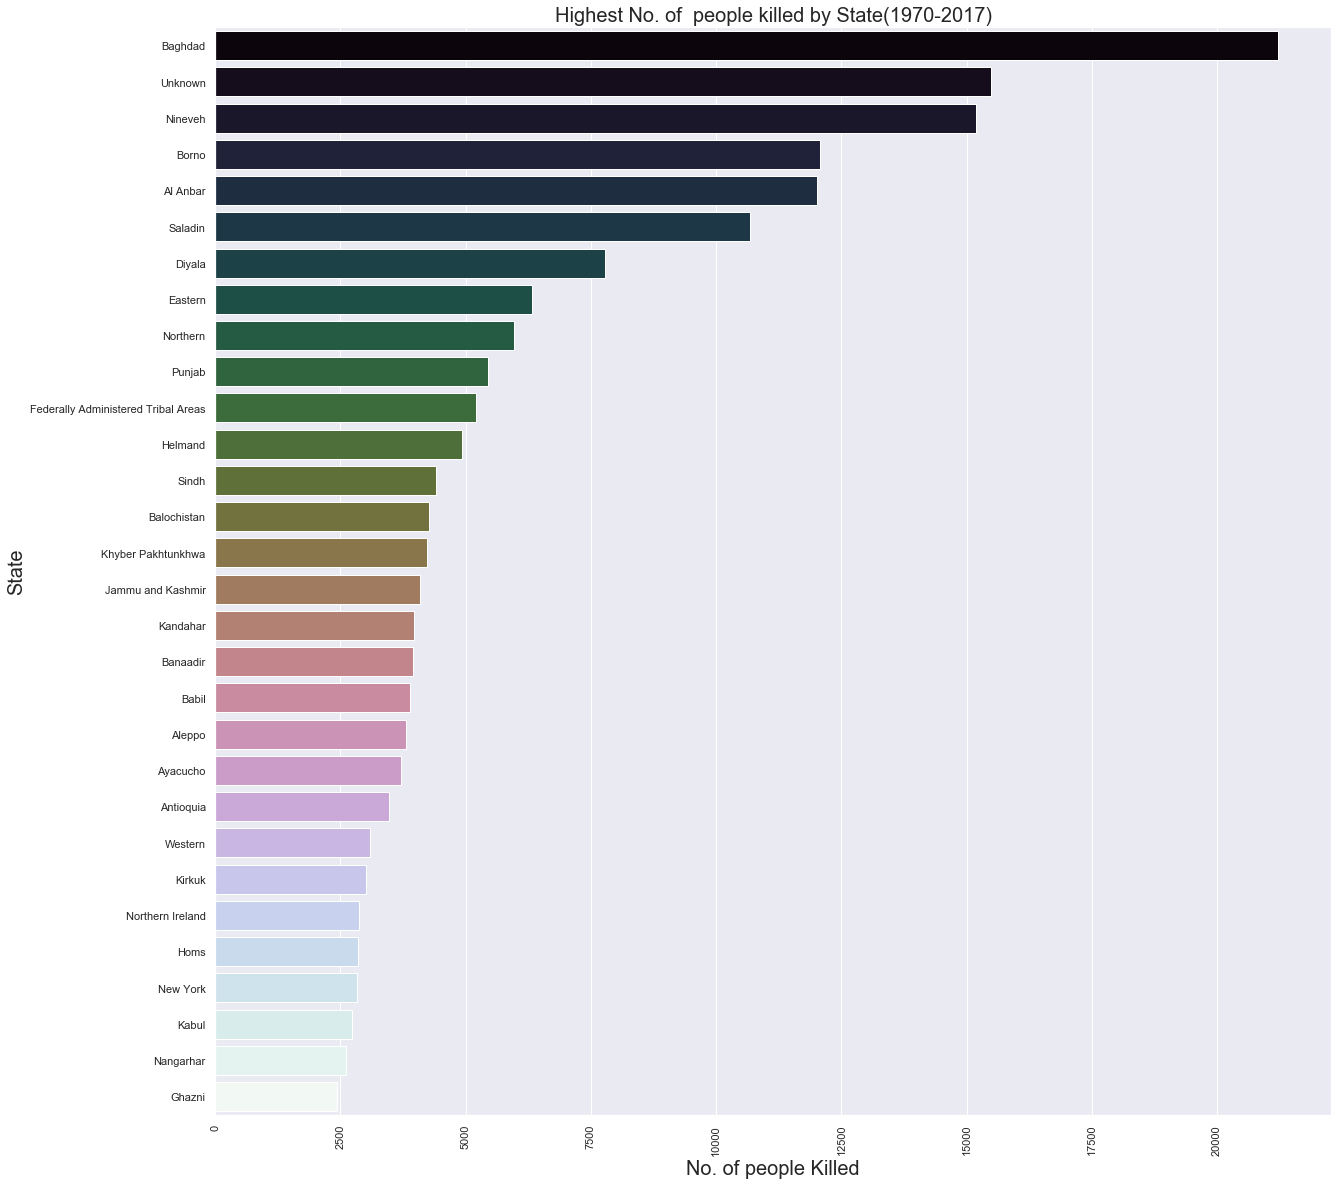

In [28]:
state_grp = df.groupby('provstate')
v = state_grp['nkill'].agg(np.sum)
value = v.nlargest(n= 30)  # top 30 states where people killed by terrorist attack
plt.figure(figsize=(20,20))
sns.barplot(x = value, y = value.index, palette = 'cubehelix')

plt.xticks(rotation=90)
plt.title('Highest No. of  people killed by State(1970-2017)', fontsize = 20)
plt.xlabel('No. of people Killed', fontsize = 20)
plt.ylabel('State', fontsize=  20)
plt.show()

__Insights:__
- Highest No. of people killed in __'Baghdad'__, __'Unknown'__, __'Nineveh'__, __'Borno'__ , __'Al Anbar'__ states from(1970-2017).

### 17. Highest No. of  people killed by city

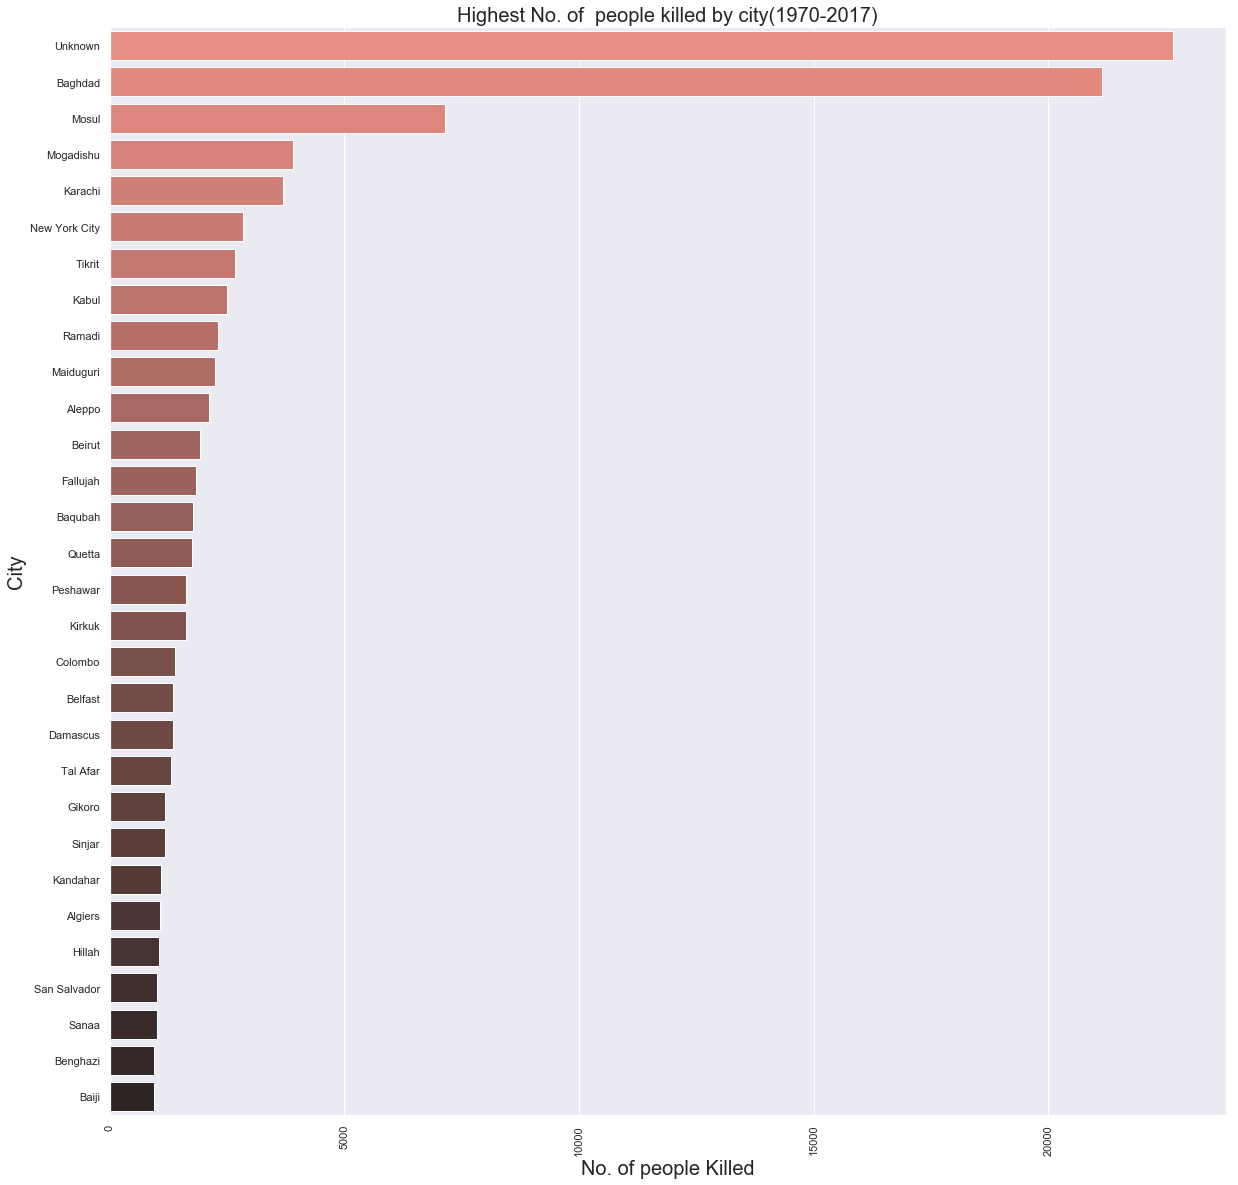

In [29]:
state_grp = df.groupby('city')
v = state_grp['nkill'].agg(np.sum)
value = v.nlargest(n= 30)  # top 30 cities where highest people killed by terrorist attack
plt.figure(figsize=(20,20))
sns.barplot(x = value, y = value.index, palette = 'dark:salmon_r')

plt.xticks(rotation=90)
plt.title('Highest No. of  people killed by city(1970-2017)', fontsize = 20)
plt.xlabel('No. of people Killed', fontsize = 20)
plt.ylabel('City', fontsize=  20)
plt.show()

__Insights:__
- Highest No. of people killed in __'Unknown'__, __'Baghdad'__, __'Mosul'__, __'Mogadishu'__, & __'Karachi'__, 'New York City' cities from(1970-2017).

### 18. Terrorist Activities by Region each Year

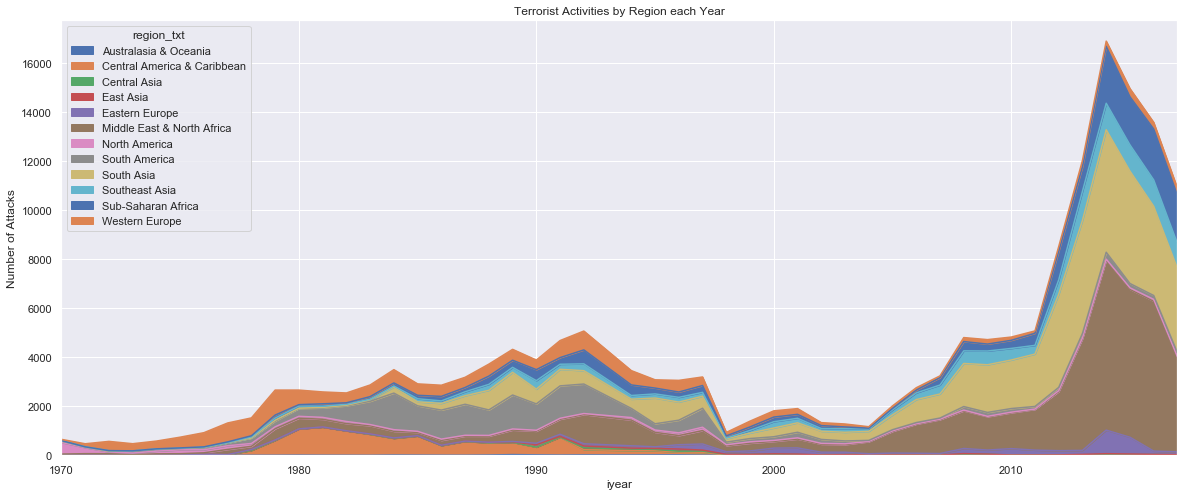

In [30]:
pd.crosstab(new_df.iyear, new_df.region_txt).plot(kind='area',figsize=(20,8))
plt.title('Terrorist Activities by Region each Year')
plt.ylabel('Number of Attacks')
plt.show()

__Insights:__
- Form the analysis Number of activities have gone up sharply after 2010 from(1970-2017).

### 19. Focusing on india

In [31]:
terror_india = new_df[new_df['country_txt'] == 'India']

### 20. Number Of terrorist activities each Year in India

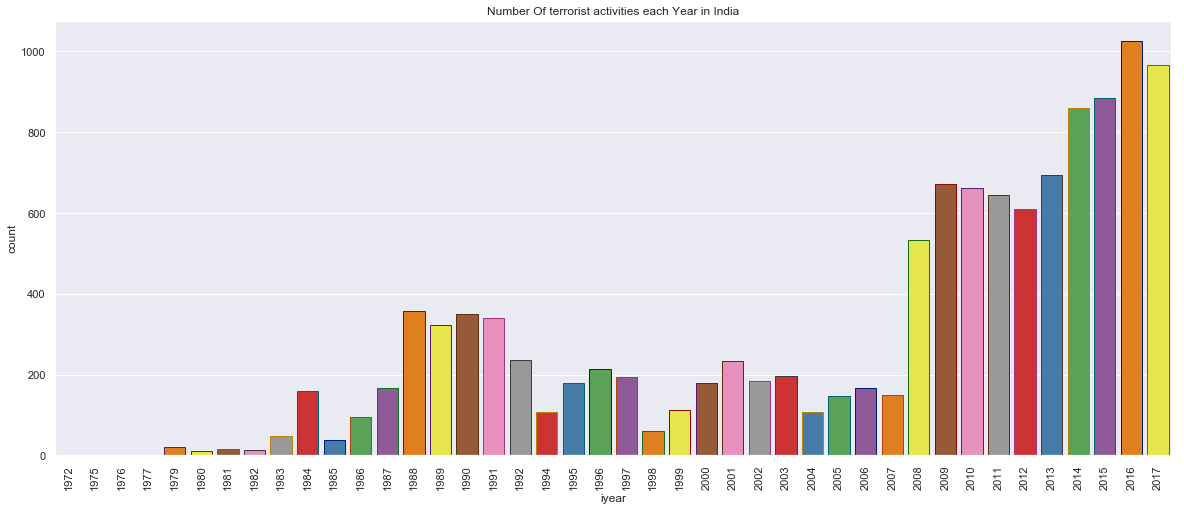

In [32]:
plt.subplots(figsize=(20,8))
sns.countplot('iyear',data=terror_india,palette='Set1',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of terrorist activities each Year in India')
plt.show()


__Insights:__
- Form the analysis Number of activities have gone up sharply after 2010 from(1970-2017) & and NO. of terrorist activity is higer in 2016 in india.

### 21. Number Of Total Attacks in Each Indian City

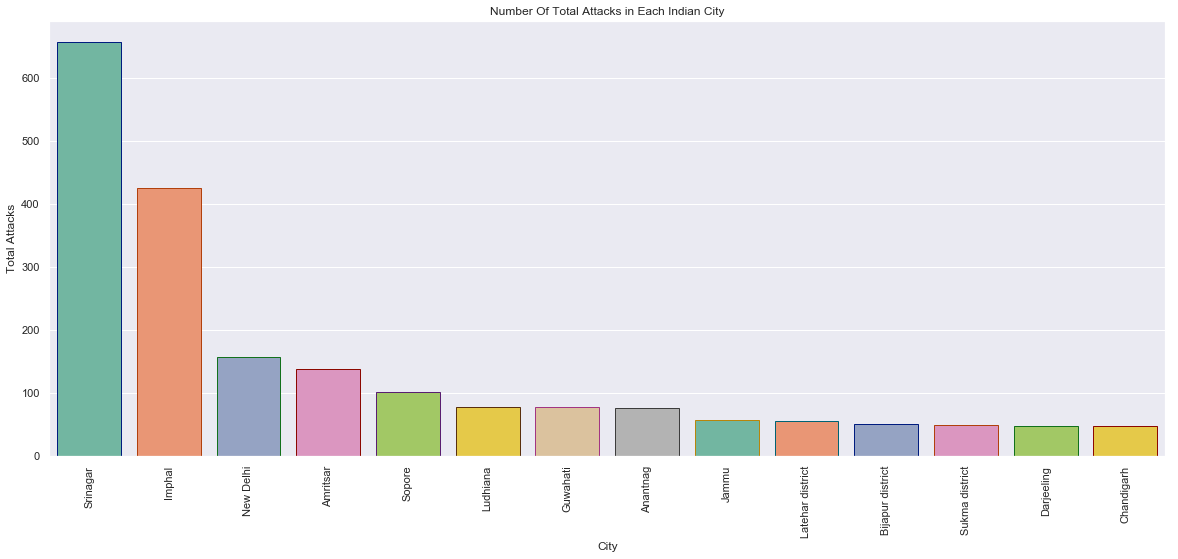

In [33]:
plt.subplots(figsize=(20,8))
city_attacks_india = terror_india.city.value_counts()[:15].reset_index()
city_attacks_india.columns = ['City', 'Total Attacks']
city_attacks_india.drop(1, inplace=True)
sns.barplot(x=city_attacks_india.City, y=city_attacks_india['Total Attacks'], palette='Set2',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Indian City')
plt.show()


__Insights:__
- Form the analysis in Srinagar city terrorist activity is higher compare to another cities in india.

### 22. Terrorist Groups with Highest Terror Attacks in India

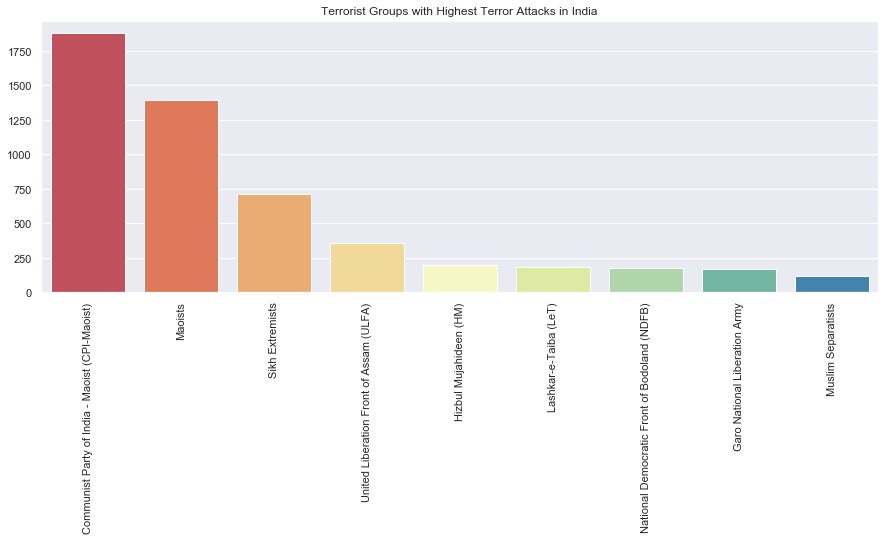

In [34]:
sns.barplot(y = terror_india['gname'].value_counts()[1:10].values,x = terror_india['gname'].value_counts()[1:10].index,palette='Spectral')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.title('Terrorist Groups with Highest Terror Attacks in India')
plt.show()


__Insights:__
- Form the analysis, __'Communist Party of India - Maoist (CPI-Maoist)'__ is terrorist group with highest terror attacks in india.


In [35]:
 terror_india['gname'].value_counts()[1:10]

Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Garo National Liberation Army                      166
Muslim Separatists                                 118
Name: gname, dtype: int64